In [23]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import display

In [2]:
from matplotlib import style
style.use('seaborn-pastel')

In [24]:
class Support_Vector_Machine:
    def __init__(self, visualisation = True):
        self.visualisation = visualisation
        self.colours = {1:'r', -1:'b'}
        if self.visualisation: 
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)
            
    def fit(self, data):
        # a basic convex optimisation
        self.data = data
        
        # { ||W|| : [W, b]}
        opt_dict = {}
        
        # for the various forms W can take
        transforms = [[1, 1],
                      [-1, 1],
                      [-1, -1],
                      [1, -1]]
        
        # to get maximum and min ranges: 
        # allows us to get a value for w and b and start stepping
        all_data = []
        for yi in self.data: # for each class (as its a dict)
            for featureset in self.data[yi]: # individual datapoint
                for feature in featureset: # each feature within a datapoint
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # support vectors yi(xi.w + b) = 1
        # Have a good optimal when you we have at least one point for each 
        # class where yi(xi.w + b) close to 1, e.g. 1.01.
        
        # our initial step size is 0.1 of our max feature value
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01, 
                      # point of expense:
                      self.max_feature_value * 0.001]
        
        # extremely expensive
        # b doesn't need to be as precise as w.
        # so we will not use as small steps
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10
    
        for step in step_sizes: # progressively smaller steps
            w = np.array([latest_optimum, latest_optimum]) # our latest value of W
            
            optimised = False # we can do this because convex
            
            while not optimised: 
                b_steps = np.arange(-1*self.max_feature_value * b_range_multiple,
                                   self.max_feature_value * b_range_multiple, 
                                  step * b_multiple) 
                for b in b_steps:
                    for transformation in transforms: 
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # Now have to run this calculation on all data which is expensive
                        
                        
                        for i in self.data: # for each class (as its a dict)
                            for xi in self.data[i]:
                                yi = i 
                                # Constraint: 
                                # yi(xi.W + b) >= 1
                                if not yi*(np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                                    #break
                                    
                            #if found_option == False: 
                                #break
                            
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                
                # As we will be transforming w for all possibile -ve variations
                # we do not need to go past w = 0 at this point
                if w[0] < 0: 
                    # if step optimised
                    optimised = True
                    print("Optimised a step")
                
                else:
                    # w = [5, 5]
                    # step = 1
                    # w - step = [4, 4]
                    w = w - step
            # Assumed we're at our optimisation value
            norms = sorted([n for n in opt_dict]) # finds smallest ||w|| produced
            opt_choice = opt_dict[norms[0]] # retrieves the w and b values for the smallest ||W|| 
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
            
            
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        
        if classification != 0 and self.visualisation: 
            self.ax.scatter(features[0], features[1], s = 200, marker = '*', c = self.colours[classification], alpha = 0.8)
        
        return classification
    
    def visualise(self):
        for label in data_dict:
            for x in data_dict[label]:
                self.ax.scatter(x[0], x[1],s=100, c = self.colours[label], alpha = 0.8)        
         
         # hyperplane = x.w + b
         # We want v = x.w + b
         # We care when V is +1 and -1 and 0
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v) / w[1]
         
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        
        # (w.x + b) = 1
        # positive support vector
        # finds the corresponding y values for the hyperplane for the 
        # x values corresponding to hyp_x_(min and max)
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'r', alpha = 0.8)
        
        # (w.x + b) = -1
        # negative support vector
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'b', alpha = 0.8)
        
        # (w.x + b) = 0
        # the decision boundary 
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'k--')
        
        display(self.fig) # Instead of plt.show(), so that fig can be shown without being cleared.

In [25]:
# {label : [x, y]}
data_dict = {-1: np.array([[1, 7],
                           [2, 8], 
                           [3, 8]]),
             1: np.array([[5, 1],
                          [6, -1], 
                          [7, 3]])}

Optimised a step
Optimised a step
Optimised a step


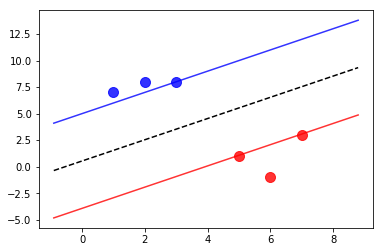

In [30]:
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
svm.visualise()

In [31]:
test_data = [[0, 10], 
            [1, 3],
            [3, 4],
            [3, 5], 
            [5, 5],
            [5, 6], 
            [6, -5],
            [5, 8]]


In [32]:
for p in test_data:
    svm.predict(p)

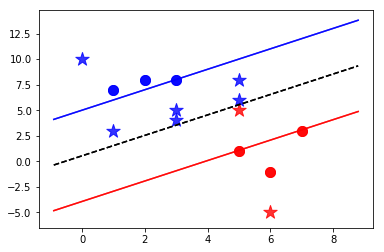

In [33]:
svm.visualise()